In [12]:
import pandas as pd

#Pandas main data types
#series 1-dimensional column
series = pd.Series(["BMW", "Toyota", "Honda", "Toyota"])
colours = pd.Series(["Red", "Blue", "White", "Blue"])
odometer =  pd.Series(["9500", "2500", "500", "750"])
#DataFrame - 2-dimensional
car_data = pd.DataFrame({"Car Make": series, "Colours": colours, "Odometer KM": odometer})
car_data

,Car Make,Colours,Odometer KM
0,BMW,Red,9500
1,Toyota,Blue,2500
2,Honda,White,500
3,Toyota,Blue,750


In [13]:
car_data.to_csv("exported_car_data.csv")

In [14]:
#list of columns in DataFrame
car_data.columns

Index(['Car Make', 'Colours', 'Odometer KM'], dtype='object')

In [15]:
#index column
car_data.index

RangeIndex(start=0, stop=4, step=1)

In [16]:
#statistical info about numerical columns
car_data.describe()

,Car Make,Colours,Odometer KM
count,4,4,4
unique,3,3,4
top,Toyota,Blue,9500
freq,2,2,1


In [17]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Car Make     4 non-null      object
 1   Colours      4 non-null      object
 2   Odometer KM  4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


In [18]:
odometer.mean()

23750625125187.5

In [19]:
#combines all columns in one
car_data.sum()

Car Make       BMWToyotaHondaToyota
Colours            RedBlueWhiteBlue
Odometer KM          95002500500750
dtype: object

In [20]:
car_data["Odometer KM"].sum()

'95002500500750'

In [21]:
car_data["Odometer KM"]

0    9500
1    2500
2     500
3     750
Name: Odometer KM, dtype: object

In [22]:
#loc - position
car_data.loc[1]

Car Make       Toyota
Colours          Blue
Odometer KM      2500
Name: 1, dtype: object

In [23]:
#iloc - index
car_data.iloc[2]


Car Make       Honda
Colours        White
Odometer KM      500
Name: 2, dtype: object

In [24]:
#Car colours colum
car_data.Colours

0      Red
1     Blue
2    White
3     Blue
Name: Colours, dtype: object

In [25]:
#Filter for records
print(car_data[car_data["Car Make"] == "Toyota"])

  Car Make Colours Odometer KM
1   Toyota    Blue        2500
3   Toyota    Blue         750


In [26]:
#type of columns
car_data.dtypes

Car Make       object
Colours        object
Odometer KM    object
dtype: object

In [30]:
#aggreagating 2 columns together, good for comparing 2 columns
pd.crosstab(car_data["Car Make"], car_data["Colours"])

Car Make,BMW,Honda,Toyota
Colours,,,
Blue,0,0,2
Red,1,0,0
White,0,1,0


<AxesSubplot:>

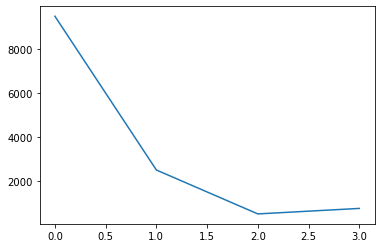

In [37]:
car_data["Odometer KM"].astype("int").plot()

<AxesSubplot:>

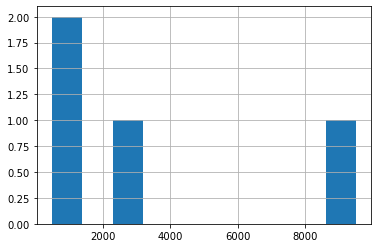

In [38]:
car_data["Odometer KM"].astype("int").hist()

## Manipulating Data


In [39]:
# string methods

car_data["Car Make"].str.lower()

0       bmw
1    toyota
2     honda
3    toyota
Name: Car Make, dtype: object

In [41]:
car_data["Car Make"] = car_data["Car Make"].str.lower()

In [42]:
car_data

,Car Make,Colours,Odometer KM
0,bmw,Red,9500
1,toyota,Blue,2500
2,honda,White,500
3,toyota,Blue,750


In [46]:
# missing data - NaN, fillna(value_to_fill)
# you can fill with mean value, but it is not good practice
#fill inside dataframe use inplace parameter

car_data["Odometer KM"].fillna(500, inplace=True)

In [48]:
car_data["Odometer KM"].dropna(inplace=True)

In [50]:
# add new column to the dataframe
car_seats = pd.Series([5,4,5])
car_data["Seats"] = car_seats
car_data

,Car Make,Colours,Odometer KM,Seats
0,bmw,Red,9500,5.0
1,toyota,Blue,2500,4.0
2,honda,White,500,5.0
3,toyota,Blue,750,NaN


In [53]:
car_data["Seats"].fillna(5, inplace=True)
car_data

,Car Make,Colours,Odometer KM,Seats
0,bmw,Red,9500,5.0
1,toyota,Blue,2500,4.0
2,honda,White,500,5.0
3,toyota,Blue,750,5.0


In [56]:
#create a column from a series
fuel_economy = [7.6, 9.2, 5.0, 8.7]
car_data["Fuel per km"] = fuel_economy
car_data

,Car Make,Colours,Odometer KM,Seats,Fuel paer km,Fuel per km
0,bmw,Red,9500,5.0,7.6,7.6
1,toyota,Blue,2500,4.0,9.2,9.2
2,honda,White,500,5.0,5.0,5.0
3,toyota,Blue,750,5.0,8.7,8.7


In [59]:
car_data["Total fuel used"] = car_data["Odometer KM"].astype(int)/100*car_data["Fuel paer km"].astype(float)
car_data

,Car Make,Colours,Odometer KM,Seats,Fuel paer km,Fuel per km,Total fuel used
0,bmw,Red,9500,5.0,7.6,7.6,722.00
1,toyota,Blue,2500,4.0,9.2,9.2,230.00
2,honda,White,500,5.0,5.0,5.0,25.00
3,toyota,Blue,750,5.0,8.7,8.7,65.25


In [60]:
# create a column from a single value
car_data["Number of wheels"] = 4
car_data

,Car Make,Colours,Odometer KM,Seats,Fuel paer km,Fuel per km,Total fuel used,Number of wheels
0,bmw,Red,9500,5.0,7.6,7.6,722.00,4
1,toyota,Blue,2500,4.0,9.2,9.2,230.00,4
2,honda,White,500,5.0,5.0,5.0,25.00,4
3,toyota,Blue,750,5.0,8.7,8.7,65.25,4


In [63]:
car_data.drop("Number of wheels", axis=1)

,Car Make,Colours,Odometer KM,Seats,Fuel paer km,Fuel per km,Total fuel used
0,bmw,Red,9500,5.0,7.6,7.6,722.00
1,toyota,Blue,2500,4.0,9.2,9.2,230.00
2,honda,White,500,5.0,5.0,5.0,25.00
3,toyota,Blue,750,5.0,8.7,8.7,65.25


In [64]:
# shuffle data, change raws order, sometimes it can influence ML model results
car_data_shuffled = car_data.sample(frac=1)
car_data_shuffled


,Car Make,Colours,Odometer KM,Seats,Fuel paer km,Fuel per km,Total fuel used,Number of wheels
1,toyota,Blue,2500,4.0,9.2,9.2,230.00,4
3,toyota,Blue,750,5.0,8.7,8.7,65.25,4
0,bmw,Red,9500,5.0,7.6,7.6,722.00,4
2,honda,White,500,5.0,5.0,5.0,25.00,4


In [65]:
car_data_shuffled.sample(frac=0.2)

,Car Make,Colours,Odometer KM,Seats,Fuel paer km,Fuel per km,Total fuel used,Number of wheels
0,bmw,Red,9500,5.0,7.6,7.6,722.0,4


In [69]:
car_data_shuffled.reset_index(inplace=True, drop=True)
car_data_shuffled

,index,Car Make,Colours,Odometer KM,Seats,Fuel paer km,Fuel per km,Total fuel used,Number of wheels
0,0,toyota,Blue,2500,4.0,9.2,9.2,230.00,4
1,1,toyota,Blue,750,5.0,8.7,8.7,65.25,4
2,2,bmw,Red,9500,5.0,7.6,7.6,722.00,4
3,3,honda,White,500,5.0,5.0,5.0,25.00,4


In [72]:
# apply method for lamda functions
car_data["Odometer KM"] = car_data["Odometer KM"].astype(float).apply(lambda x: x/1.6)
car_data

,Car Make,Colours,Odometer KM,Seats,Fuel paer km,Fuel per km,Total fuel used,Number of wheels
0,bmw,Red,3710.93750,5.0,7.6,7.6,722.00,4
1,toyota,Blue,976.56250,4.0,9.2,9.2,230.00,4
2,honda,White,195.31250,5.0,5.0,5.0,25.00,4
3,toyota,Blue,292.96875,5.0,8.7,8.7,65.25,4
